In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 1
### 1.1

In [2]:
population = read.csv("FAOSTAT_data_12-12-2020_population.csv", header=TRUE)

In [3]:
pop <- population %>% select (Area, Year, Value) %>% filter(Year==2013) 

In [4]:
sum(pop['Value'])

[1] 8633817

In [5]:
pop1 <- population %>% filter(Area.Code!=351)

In [6]:
pop1 %>% filter(Area.Code==351) 

Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description,Note
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>


In [7]:
pop_r <- pop1 %>% select (Area, Year, Value) %>% filter(Year==2013) 

In [8]:
sum(pop_r['Value'])

[1] 7210846

In [9]:
population_final <- pop1 %>% select(Area,Area.Code,Year,Value) %>% mutate(Population = Value * 1000) %>% select(Area,Area.Code,Year,Population)

In [10]:
p1 <- population_final %>% select (Area, Year, Population) %>% filter(Year==2013)
sum(p1['Population'])

[1] 7210845848

In [11]:
p2 <- population_final %>% select (Area, Year, Population) %>% filter(Year==2018)
sum(p2['Population'])

[1] 7631368523

In [12]:
population_final <- population_final %>% rename(c("country"="Area", "year"="Year"))
population_final

country,Area.Code,year,Population
<fct>,<int>,<int>,<dbl>
Afghanistan,2,2013,32269589
Afghanistan,2,2014,33370794
Afghanistan,2,2015,34413603
Afghanistan,2,2016,35383032
Afghanistan,2,2017,36296113
Afghanistan,2,2018,37171921
Albania,3,2013,2903790
Albania,3,2014,2896305
Albania,3,2015,2890513


## 2
### 2.1
2.1.1

In [13]:
dispo_alim = read.csv("ani_and_veg.csv", header=TRUE)

In [14]:
unique(dispo_alim$country)

[1] Armenia                                             
  [2] Afghanistan                                         
  [3] Albania                                             
  [4] Algeria                                             
  [5] Angola                                              
  [6] Antigua and Barbuda                                 
  [7] Argentina                                           
  [8] Australia                                           
  [9] Austria                                             
 [10] Bahamas                                             
 [11] Barbados                                            
 [12] Bangladesh                                          
 [13] Bolivia (Plurinational State of)                    
 [14] Botswana                                            
 [15] Brazil                                              
 [16] Belize                                              
 [17] Solomon Islands                                     
 [18] Bulgaria                                            
 [19] Myanmar                                             
 [20] Cameroon                                            
 [21] Canada                                              
 [22] Cabo Verde                                          
 [23] Central African Republic                            
 [24] Sri Lanka                                           
 [25] Chad                                                
 [26] Chile                                               
 [27] China, mainland                                     
 [28] Colombia                                            
 [29] Congo                                               
 [30] Costa Rica                                          
 [31] Cuba                                                
 [32] Cyprus                                              
 [33] Azerbaijan                                          
 [34] Benin                                               
 [35] Denmark                                             
 [36] Dominica                                            
 [37] Dominican Republic                                  
 [38] Belarus                                             
 [39] Ecuador                                             
 [40] Egypt                                               
 [41] El Salvador                                         
 [42] Estonia                                             
 [43] Fiji                                                
 [44] Finland                                             
 [45] France                                              
 [46] French Polynesia                                    
 [47] Djibouti                                            
 [48] Georgia                                             
 [49] Gabon                                               
 [50] Gambia                                              
 [51] Germany                                             
 [52] Bosnia and Herzegovina                              
 [53] Ghana                                               
 [54] Kiribati                                            
 [55] Greece                                              
 [56] Grenada                                             
 [57] Guatemala                                           
 [58] Guinea                                              
 [59] Guyana                                              
 [60] Haiti                                               
 [61] Honduras                                            
 [62] China, Hong Kong SAR                                
 [63] Hungary                                             
 [64] Croatia                                             
 [65] Iceland                                             
 [66] India                                               
 [67] Indonesia                                           
 [68] Iran (Islamic Republic of)                 

In [15]:
dispo_alim <- dispo_alim %>% select(country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday)


In [16]:
dispo_alim <- dispo_alim %>% select(country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday) %>%
                                          filter(country!="China")

In [17]:
cereal_code = c(2511,2805,2513,2514,2517,2520,2515,2516,2518)

In [18]:
dispo_alim <- dispo_alim %>% mutate(is_cereal = ifelse(item_code %in% cereal_code, TRUE, FALSE))

In [19]:
dispo_alim

country_code,country,year,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal
<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,Armenia,2014,Wheat and products,2511,vegetal,639,1039,30.98,3.69,TRUE
1,Armenia,2015,Wheat and products,2511,vegetal,685,1049,31.27,3.84,TRUE
1,Armenia,2016,Wheat and products,2511,vegetal,650,1057,31.50,3.90,TRUE
1,Armenia,2017,Wheat and products,2511,vegetal,558,1053,31.35,3.97,TRUE
1,Armenia,2014,Barley and products,2513,vegetal,196,8,0.27,0.04,TRUE
1,Armenia,2015,Barley and products,2513,vegetal,203,8,0.29,0.04,TRUE
1,Armenia,2016,Barley and products,2513,vegetal,213,7,0.25,0.04,TRUE
1,Armenia,2017,Barley and products,2513,vegetal,114,4,0.15,0.02,TRUE
1,Armenia,2014,Maize and products,2514,vegetal,88,60,3.14,0.68,TRUE


2.1.2

In [20]:
true <- dispo_alim %>% filter (is_cereal==TRUE)
sum(true['domestic_supply_quantity'],na.rm=TRUE)

[1] 11207349

In [21]:
false <- dispo_alim %>% filter (is_cereal==FALSE)
sum(false['domestic_supply_quantity'],na.rm=TRUE)

[1] 31766650

In [22]:
13698456 / (38312084) * 100

[1] 35.75492

## 2.2
2.2.1


In [23]:
dispo_alim_pop <- merge(dispo_alim, population_final, by = c("country","year"))

In [24]:
dispo_alim_pop

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>
Afghanistan,2014,2,Wheat and products,2511,vegetal,6697,1325,35.70,4.52,TRUE,2,33370794
Afghanistan,2014,2,Pepper,2640,vegetal,0,0,0.00,0.00,FALSE,2,33370794
Afghanistan,2014,2,"Roots, Other",2534,vegetal,0,NA,NA,NA,FALSE,2,33370794
Afghanistan,2014,2,Soyabean Oil,2571,vegetal,10,7,0.00,0.82,FALSE,2,33370794
Afghanistan,2014,2,Barley and products,2513,vegetal,532,13,0.41,0.12,TRUE,2,33370794
Afghanistan,2014,2,Pimento,2641,vegetal,0,NA,NA,NA,FALSE,2,33370794
Afghanistan,2014,2,Yams,2535,vegetal,0,NA,NA,NA,FALSE,2,33370794
Afghanistan,2014,2,Groundnut Oil,2572,vegetal,0,0,0.00,0.00,FALSE,2,33370794
Afghanistan,2014,2,Maize and products,2514,vegetal,330,18,0.45,0.24,TRUE,2,33370794


In [25]:
dispo_alim_country <-dispo_alim %>% select (country,year,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday) %>% group_by(country,year) %>% 
                summarise(total_food_supply_kcalcapitaday = sum(food_supply_kcalcapitaday,na.rm=TRUE),
                       total_protein_supply_quantity_kgcapitaday = 1000*sum(protein_supply_quantity_gcapitaday,na.rm=TRUE)) 

`summarise()` regrouping output by 'country' (override with `.groups` argument)



In [26]:
head(dispo_alim_country)

country,year,total_food_supply_kcalcapitaday,total_protein_supply_quantity_kgcapitaday
<fct>,<int>,<dbl>,<dbl>
Afghanistan,2014,2018,56130
Afghanistan,2015,1974,54620
Afghanistan,2016,2004,54600
Afghanistan,2017,1997,54090
Albania,2014,3272,113460
Albania,2015,3255,111670


In [27]:
dispo_alim_pop <- dispo_alim_pop %>% mutate (food_supply_kcal=Population*food_supply_kcalcapitaday*365, food_supply_kgprotein=Population*protein_supply_quantity_gcapitaday*365/1000)

In [28]:
dispo_alim_pop %>% filter(country=="Armenia")

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Wheat and products,2511,vegetal,639,1039,30.98,3.69,TRUE,1,2912409,1.104487e+12,32932647.25
Armenia,2014,1,Rape and Mustard Oil,2574,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00
Armenia,2014,1,"Alcohol, Non-Food",2659,vegetal,10,NA,NA,NA,FALSE,1,2912409,NA,NA
Armenia,2014,1,Beer,2656,vegetal,16,8,0.08,0.00,FALSE,1,2912409,8.504234e+09,85042.34
Armenia,2014,1,Barley and products,2513,vegetal,196,8,0.27,0.04,TRUE,1,2912409,8.504234e+09,287017.91
Armenia,2014,1,Cottonseed Oil,2575,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00
Armenia,2014,1,Infant food,2680,vegetal,0,1,0.06,0.01,FALSE,1,2912409,1.063029e+09,63781.76
Armenia,2014,1,"Beverages, Fermented",2657,vegetal,0,0,0.00,0.00,FALSE,1,2912409,0.000000e+00,0.00
Armenia,2014,1,Maize and products,2514,vegetal,88,60,3.14,0.68,TRUE,1,2912409,6.378176e+10,3337911.95


2.2.2

In [29]:
dispo_alim_pop<- dispo_alim_pop %>% mutate (ratio_energie_poids = food_supply_kcal/(domestic_supply_quantity*1000000))

In [30]:
dispo_alim_pop %>% filter(country=="Armenia" & item_code==2516)

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Oats,2516,vegetal,8,5,0.19,0.09,TRUE,1,2912409,5315146425,201975.6,664.3933
Armenia,2015,1,Oats,2516,vegetal,10,5,0.18,0.08,TRUE,1,2925553,5339134225,192208.8,533.9134
Armenia,2016,1,Oats,2516,vegetal,10,5,0.20,0.10,TRUE,1,2936143,5358460975,214338.4,535.8461
Armenia,2017,1,Oats,2516,vegetal,7,7,0.26,0.12,TRUE,1,2944791,7523941005,279460.7,1074.8487


2.2.3

In [31]:
dispo_alim_pop<- dispo_alim_pop %>% mutate (ratio_poids_proteines_poids_total = food_supply_kgprotein/(domestic_supply_quantity*1000000))

In [32]:
dispo_alim_pop %>% filter(country=="Armenia" & item_code==2516)

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids,ratio_poids_proteines_poids_total
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Armenia,2014,1,Oats,2516,vegetal,8,5,0.19,0.09,TRUE,1,2912409,5315146425,201975.6,664.3933,0.02524695
Armenia,2015,1,Oats,2516,vegetal,10,5,0.18,0.08,TRUE,1,2925553,5339134225,192208.8,533.9134,0.01922088
Armenia,2016,1,Oats,2516,vegetal,10,5,0.20,0.10,TRUE,1,2936143,5358460975,214338.4,535.8461,0.02143384
Armenia,2017,1,Oats,2516,vegetal,7,7,0.26,0.12,TRUE,1,2944791,7523941005,279460.7,1074.8487,0.03992295


## 2.3
2.3.1

In [33]:
dispo_alim_pop

country,year,country_code,item,item_code,origin,domestic_supply_quantity,food_supply_kcalcapitaday,protein_supply_quantity_gcapitaday,fat_supply_quantity_gcapitaday,is_cereal,Area.Code,Population,food_supply_kcal,food_supply_kgprotein,ratio_energie_poids,ratio_poids_proteines_poids_total
<fct>,<int>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2014,2,Wheat and products,2511,vegetal,6697,1325,35.70,4.52,TRUE,2,33370794,1.613895e+13,434838131.2,2409.8776,0.064930287
Afghanistan,2014,2,Pepper,2640,vegetal,0,0,0.00,0.00,FALSE,2,33370794,0.000000e+00,0.0,NaN,NaN
Afghanistan,2014,2,"Roots, Other",2534,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,Soyabean Oil,2571,vegetal,10,7,0.00,0.82,FALSE,2,33370794,8.526238e+10,0.0,8526.2379,0.000000000
Afghanistan,2014,2,Barley and products,2513,vegetal,532,13,0.41,0.12,TRUE,2,33370794,1.583444e+11,4993939.3,297.6399,0.009387104
Afghanistan,2014,2,Pimento,2641,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,Yams,2535,vegetal,0,NA,NA,NA,FALSE,2,33370794,NA,NA,NA,NA
Afghanistan,2014,2,Groundnut Oil,2572,vegetal,0,0,0.00,0.00,FALSE,2,33370794,0.000000e+00,0.0,NaN,NaN
Afghanistan,2014,2,Maize and products,2514,vegetal,330,18,0.45,0.24,TRUE,2,33370794,2.192461e+11,5481152.9,664.3822,0.016609554


In [35]:
aliments_les_plus_cal <- dispo_alim_pop %>% select(item,ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                         drop_na(ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                        filter(ratio_energie_poids!=0 & is.finite(ratio_energie_poids)==TRUE) %>%
                        group_by(item) %>% summarise(ratio_kcal_kg=mean(ratio_energie_poids),protein_pourcentage = mean(ratio_poids_proteines_poids_total)*100) %>%
                        arrange(desc(ratio_kcal_kg)) %>% head(20)
aliments_les_plus_cal

`summarise()` ungrouping output (override with `.groups` argument)



item,ratio_kcal_kg,protein_pourcentage
<fct>,<dbl>,<dbl>
"Butter, Ghee",52645.519,2.17595294
Cocoa Beans and products,19634.206,36.75895591
"Fats, Animals, Raw",9722.878,1.43594314
Ricebran Oil,8872.869,0.00000000
Sesameseed Oil,8867.624,0.00000000
Groundnut Oil,8554.235,0.00000000
Maize Germ Oil,8363.753,0.01896400
Olive Oil,8205.236,0.00000000
Cottonseed Oil,8025.535,0.02203768


2.3.2

In [36]:
aliments_les_plus_proteine <- dispo_alim_pop %>% select(item,ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                         drop_na(ratio_energie_poids,ratio_poids_proteines_poids_total) %>% 
                        filter(ratio_poids_proteines_poids_total!=0 & is.finite(ratio_poids_proteines_poids_total)==TRUE) %>%
                        group_by(item) %>% summarise(ratio_kcal_kg=mean(ratio_energie_poids),protein_pourcentage = mean(ratio_poids_proteines_poids_total)*100) %>%
                        arrange(desc(protein_pourcentage)) %>% head(20)
aliments_les_plus_proteine

`summarise()` ungrouping output (override with `.groups` argument)



item,ratio_kcal_kg,protein_pourcentage
<fct>,<dbl>,<dbl>
Cocoa Beans and products,18687.9792,36.121361
"Meat, Other",1147.2199,18.993810
Beans,2667.3526,17.421550
Peas,2373.9171,16.049158
"Pulses, Other and products",2276.4515,14.643894
Groundnuts (Shelled Eq),3223.6375,14.604583
"Offals, Edible",956.7199,14.591273
Infant food,3269.7605,14.500970
Mutton & Goat Meat,1940.3466,13.319529


## 2.4

In [37]:
sapply(dispo_alim_pop, function(x) sum(is.na(x)))

country                               year 
                                 0                                  0 
                      country_code                               item 
                                 0                                  0 
                         item_code                             origin 
                                 0                                  0 
          domestic_supply_quantity          food_supply_kcalcapitaday 
                               590                               6447 
protein_supply_quantity_gcapitaday     fat_supply_quantity_gcapitaday 
                              6324                               6302 
                         is_cereal                          Area.Code 
                                 0                                  0 
                        Population                   food_supply_kcal 
                                 0                               6447 
             food_supply_kgprotein                ratio_energie_poids 
                              6324                              18690 
 ratio_poids_proteines_poids_total 
                             18387

In [38]:
veg_dispo <- dispo_alim_pop %>% 
                   filter(origin=="vegetal") %>% #& food_supply_kcal!= 0 | food_supply_kgprotein!= 0 )& is.finite(food_supply_kgprotein)==FALSE))
                   group_by(year) %>% summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
veg_dispo

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot
<int>,<dbl>,<dbl>
2014,6.163196e+15,127559184778
2015,6.257970e+15,129744472919
2016,6.344464e+15,132245101174
2017,6.439711e+15,134722906360


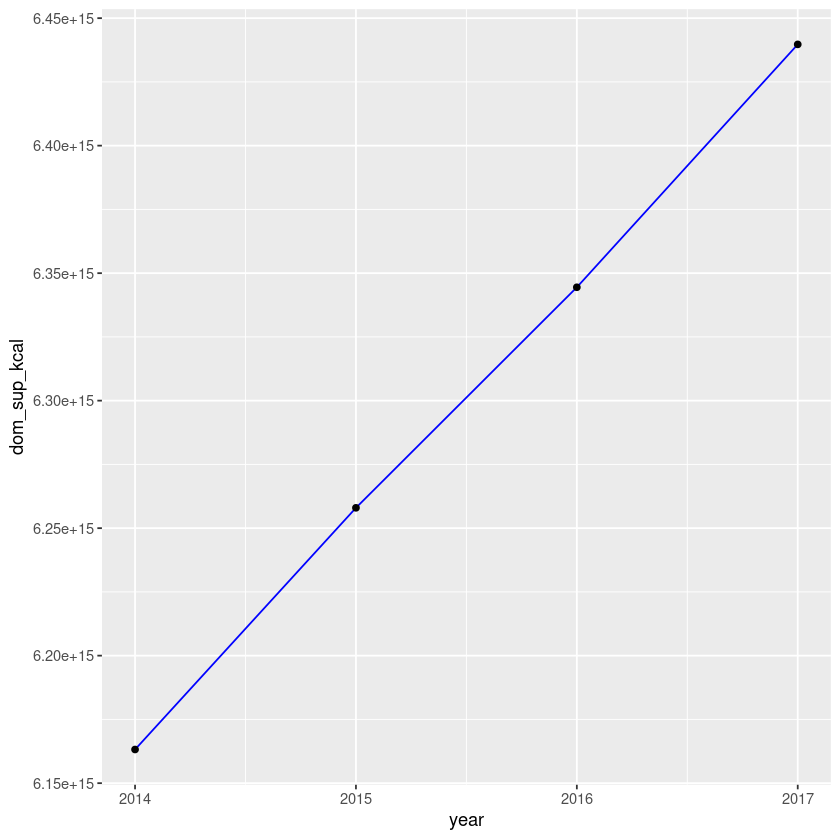

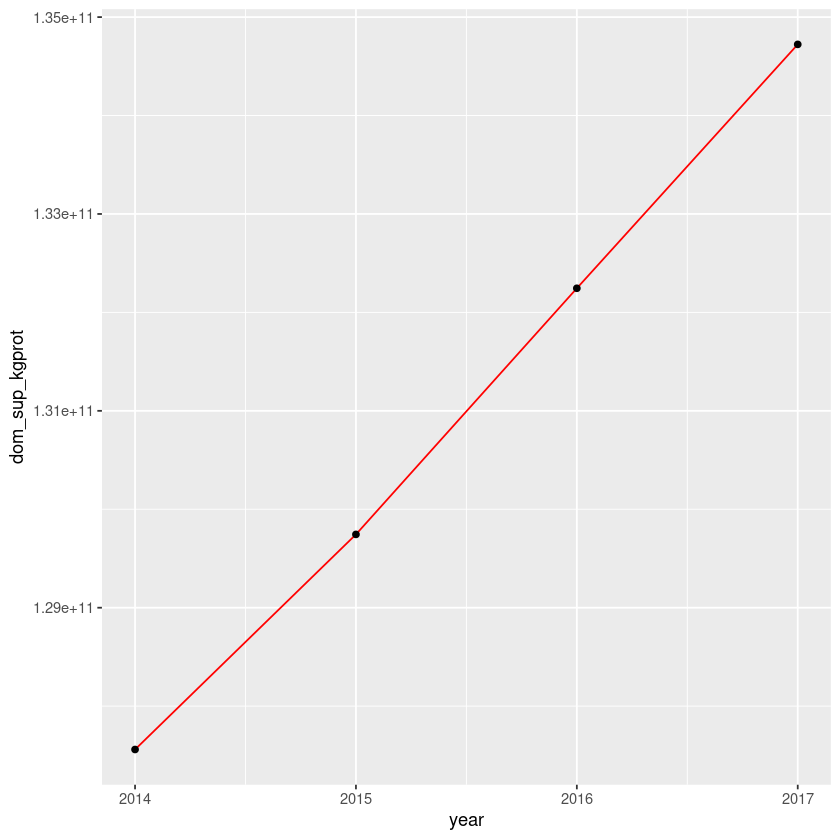

In [39]:
ggplot(data=veg_dispo, aes(x=year, y=dom_sup_kcal,group=1)) +
  geom_line(color="blue")+
  geom_point()

ggplot(data=veg_dispo, aes(x=year, y=dom_sup_kgprot, group=1)) +
  geom_line(color="red")+
  geom_point()

In [40]:
veg_dispo

year,dom_sup_kcal,dom_sup_kgprot
<int>,<dbl>,<dbl>
2014,6.163196e+15,127559184778
2015,6.257970e+15,129744472919
2016,6.344464e+15,132245101174
2017,6.439711e+15,134722906360


2.4.2

Question 7 : Combien d'humains pourraient être nourris si toute la disponibilité intérieure mondiale de produits végétaux était utilisée pour de la nourriture ?
Nombre de calories par jour et par personne
NB_KCAL_PER_CAPITA_PER_DAY = 2500

Poids moyen d'un humain : 62kg (https://en.wikipedia.org/wiki/Human_body_weight)
Besoin en protéines moyens pour un humain : 0.9 g/kg/jour
KG_PROT_PER_CAPITA_PER_DAY = 62 * .9 * .001

YEAR = 2013

population = dom_sup.loc[YEAR, "dom_sup_kcal"] / 365 / NB_KCAL_PER_CAPITA_PER_DAY

print("Population potentiellement nourrie par la disponibilité intérieure en produits issus de végétaux (en termes calorifiques) : {} Miliards, \nsoit {}% de la population mondiale.".format(round(population/1000000000,2), round(100*population/total_pop[YEAR])))

population = dom_sup.loc[YEAR, "dom_sup_kgprot"] / 365 / KG_PROT_PER_CAPITA_PER_DAY

print("Population potentiellement nourrie par la disponibilité intérieure en produits issus de végétaux (en termes de protéines) : {} Miliards, \nsoit {}% de la population mondiale.".format(round(population/1000000000,2), round(100*population/total_pop[YEAR])))

In [41]:
NB_KCAL_PER_CAPITA_PER_DAY <- 2500
KG_PROT_PER_CAPITA_PER_DAY <- 62 * .9 * .001

In [42]:
population_total <- population_final %>% group_by(year) %>% summarise(population_total=sum(Population))
population_total
veg_dispo_total_population <- merge(veg_dispo,population_total)
veg_dispo_total_population

`summarise()` ungrouping output (override with `.groups` argument)



year,population_total
<int>,<dbl>
2013,7210845848
2014,7295557771
2015,7380067075
2016,7464294742
2017,7548134111
2018,7631368523


year,dom_sup_kcal,dom_sup_kgprot,population_total
<int>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771
2015,6.257970e+15,129744472919,7380067075
2016,6.344464e+15,132245101174,7464294742
2017,6.439711e+15,134722906360,7548134111


In [43]:
veg_dispo_total_population <- veg_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)

In [44]:
veg_dispo_total_population

year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771,6754187749,6263032591
2015,6.257970e+15,129744472919,7380067075,6858049540,6370328125
2016,6.344464e+15,132245101174,7464294742,6952836738,6493106553
2017,6.439711e+15,134722906360,7548134111,7057217372,6614764391


In [45]:
veg_dispo_total_population_pourcentage <- veg_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
veg_dispo_total_population_pourcentage

year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,6.163196e+15,127559184778,7295557771,6754187749,6263032591,92.57946,85.84721
2015,6.257970e+15,129744472919,7380067075,6858049540,6370328125,92.92666,86.31802
2016,6.344464e+15,132245101174,7464294742,6952836738,6493106553,93.14794,86.98888
2017,6.439711e+15,134722906360,7548134111,7057217372,6614764391,93.49618,87.63443


In [46]:
6754187749/7295557771

[1] 0.9257946

In [47]:
round(7295557771/1000000000,2)

[1] 7.3

In [48]:
round(100*6754187749/7295557771) 

[1] 93

In [49]:
6754187749/7295557771

[1] 0.9257946

In [50]:
127559184778/KG_PROT_PER_CAPITA_PER_DAY/365

[1] 6263032591

2.4.3

In [51]:
dispo_alim_veg_pop <-dispo_alim_pop %>% filter(origin=="vegetal")

In [52]:
list_veg <- unique(dispo_alim_veg_pop["item"])
list_veg

,item
,<fct>
1,Wheat and products
2,Pepper
3,"Roots, Other"
4,Soyabean Oil
5,Barley and products
6,Pimento
7,Yams
8,Groundnut Oil
9,Maize and products


In [53]:
dispo_alim_cereal_pop <-dispo_alim_pop %>% filter(is_cereal==TRUE)

In [54]:
feed <- unique(dispo_alim_cereal_pop["item"])
feed

,item
,<fct>
1,Wheat and products
2,Barley and products
3,Maize and products
4,Rye and products
5,Oats
6,Millet and products
7,Sorghum and products
8,"Cereals, Other"
9,Rice and products


In [55]:
waste <- unique(dispo_alim_veg_pop["item"]) %>% filter(str_detect(item, " Oil"))
waste

item
<fct>
Soyabean Oil
Groundnut Oil
Sunflowerseed Oil
Rape and Mustard Oil
Cottonseed Oil
Palmkernel Oil
Palm Oil
Coconut Oil
Sesameseed Oil


In [56]:
without_feed <- anti_join(list_veg, feed, by = "item")
food <- anti_join(without_feed, waste, by = "item")
food

item
<fct>
Pepper
"Roots, Other"
Pimento
Yams
Cloves
Sugar cane
"Spices, Other"
Sugar beet
Wine


In [57]:
feed_waste <- bind_rows(feed, waste)
feed_waste
waste_food <- bind_rows(food, waste)
waste_food
food_feed <- bind_rows(food, feed)
food_feed

item
<fct>
Wheat and products
Barley and products
Maize and products
Rye and products
Oats
Millet and products
Sorghum and products
"Cereals, Other"
Rice and products


item
<fct>
Pepper
"Roots, Other"
Pimento
Yams
Cloves
Sugar cane
"Spices, Other"
Sugar beet
Wine


item
<fct>
Pepper
"Roots, Other"
Pimento
Yams
Cloves
Sugar cane
"Spices, Other"
Sugar beet
Wine


In [58]:
dispo_alim_pop_food <- anti_join(dispo_alim_pop, feed_waste, by = "item") %>% filter(origin=="vegetal")
food_dispo <- dispo_alim_pop_food %>% 
                   group_by(year) %>% 
                   summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
food_dispo_total_population <- merge(food_dispo,population_total)
food_dispo_total_population <- food_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)
food_dispo_total_population_pourcentage <- food_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
food_dispo_total_population_pourcentage

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,2.058131e+15,43981395117,7295557771,2255485603,2159443959,30.91588,29.59944
2015,2.092442e+15,44865275070,7380067075,2293087090,2202841610,31.07136,29.84853
2016,2.115466e+15,46070459140,7464294742,2318318867,2262014982,31.05878,30.30447
2017,2.151126e+15,47581918456,7548134111,2357398503,2336226173,31.23154,30.95104


In [59]:
dispo_alim_pop_feed <- anti_join(dispo_alim_pop, waste_food, by = "item") %>% filter(origin=="vegetal")
#dispo_alim_pop_feed
feed_dispo <- dispo_alim_pop_feed %>% 
                   group_by(year) %>% 
                   summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
feed_dispo_total_population <- merge(feed_dispo,population_total)
feed_dispo_total_population <- feed_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)
feed_dispo_total_population_pourcentage <- feed_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
feed_dispo_total_population_pourcentage

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,3.399698e+15,83507006407,7295557771,3725696021,4100113242,51.06801,56.20013
2015,3.452247e+15,84806520500,7380067075,3783283839,4163918127,51.26354,56.42114
2016,3.505290e+15,86102642253,7464294742,3841413619,4227556452,51.46385,56.63705
2017,3.545156e+15,87067427027,7548134111,3885102355,4274926451,51.47103,56.63554


In [60]:
dispo_alim_pop_waste <- anti_join(dispo_alim_pop, food_feed, by = "item") %>% filter(origin=="vegetal")
waste_dispo <- dispo_alim_pop_waste %>% 
                   group_by(year) %>% 
                   summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
waste_dispo_total_population <- merge(waste_dispo,population_total)
waste_dispo_total_population <- waste_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)
waste_dispo_total_population_pourcentage <- waste_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
waste_dispo_total_population_pourcentage

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,7.053681e+14,70783254,7295557771,773006124,3475389,10.59557,0.04763706
2015,7.132817e+14,72677348,7380067075,781678611,3568388,10.59175,0.04835169
2016,7.237076e+14,71999780,7464294742,793104252,3535120,10.62531,0.04736040
2017,7.434288e+14,73560878,7548134111,814716513,3611768,10.79361,0.04784981


2.4.4

In [61]:
dispo_alim_pop_waste_feed <- anti_join(dispo_alim_pop, food, by = "item") %>% filter(origin=="vegetal")
waste_feed_dispo <- dispo_alim_pop_waste_feed %>% 
                   group_by(year) %>% 
                   summarise(dom_sup_kcal=sum(food_supply_kcal,na.rm=TRUE), dom_sup_kgprot=sum(food_supply_kgprotein,na.rm=TRUE))
waste_feed_dispo_total_population <- merge(waste_feed_dispo,population_total)
waste_feed_dispo_total_population <- waste_feed_dispo_total_population %>% mutate(pop_potentiel_cal=dom_sup_kcal/365/NB_KCAL_PER_CAPITA_PER_DAY,
                                                                    pop_potentiel_proteine=dom_sup_kgprot/365/KG_PROT_PER_CAPITA_PER_DAY)
waste_feed_dispo_total_population_pourcentage <- waste_feed_dispo_total_population %>% mutate(pop_potentiel_cal_pourcentage=pop_potentiel_cal/population_total*100,
                                                                                pop_potentiel_proteine_pourcentage=pop_potentiel_proteine/population_total*100)
waste_feed_dispo_total_population_pourcentage

`summarise()` ungrouping output (override with `.groups` argument)



year,dom_sup_kcal,dom_sup_kgprot,population_total,pop_potentiel_cal,pop_potentiel_proteine,pop_potentiel_cal_pourcentage,pop_potentiel_proteine_pourcentage
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014,4.105066e+15,83577789661,7295557771,4498702145,4103588632,61.66358,56.24777
2015,4.165528e+15,84879197849,7380067075,4564962450,4167486515,61.85530,56.46949
2016,4.228998e+15,86174642033,7464294742,4634517870,4231091571,62.08916,56.68441
2017,4.288585e+15,87140987904,7548134111,4699818868,4278538219,62.26464,56.68339


## 3
### 3.1

In [62]:
sous_nutrition = read.csv('FAOSTAT_data_12-12-2020 _food_security_indicators.csv', header=TRUE)
sous_nutrition <- sous_nutrition %>% filter(Area!= "China")
sous_nutrition$Value <- as.numeric(sous_nutrition$Value)

In [63]:
sous_nutrition

Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description,Note
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<lgl>
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2012-2014,millions,131,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2013-2015,millions,133,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2014-2016,millions,134,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20152017,2015-2017,millions,140,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20162018,2016-2018,millions,25,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20172019,2017-2019,millions,29,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2012-2014,millions,3,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2013-2015,millions,3,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2014-2016,millions,3,F,FAO estimate,NA


In [64]:
sous_nutrition$Value

[1] 131 133 134 140  25  29   3   3   3   3   3   3  15  15  15  15  15  14
  [19]   1   1   1   1   1   1   1   1   1   1   1   1 125 117 108 111 113 112
  [37]   1   1   1   1   1   1  14   1  13  15  17  19   2   2   2   2   2   2
  [55]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
  [73]   1   1   1   1   1   1   1   1   1   1   1   1  71  74  76  73  70  66
  [91]   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1   1   1
 [109]   2   2   2   2   2   2  10  10  10  10  10  10   1   1   1   1   1   1
 [127]   1   1   1   1   1   1  55  21  20  19  19  20   1   1   1   1   1   1
 [145]   6   6   6   6   7   7   1   1   1   1   1   1   1   1   1   1   1   1
 [163]   5   5   4   4   4   4  88  88  89  91  92  94   1   1   1   1   1   1
 [181]   2   2   2   2   2   3  56  58  59  59  59  59  17  17  18  18  18  18
 [199]   1   1   1   1   1   1   1   1   1   1   1   1 104 105 105 108 112 116
 [217]   8   8   8   8   8   9   1   1   1   1   1   1   2   2   2   2   2   2
 [235]   1   1   1   1   1   1  11  11  11  11  11  10  95  91  88  63  62  62
 [253]   1   1   1   1   1   1  16  14  14  15  16  17   1   1   1   1   1   1
 [271]   4   4   4   4   4   4 103 102 102 102 104 105   1   1   1   1   1   1
 [289]   1   1   1   1   1   1   2   2   2   2   2   2   1   1   1   1   1   1
 [307]  24  27  30  32  35  36   1   1   1   1   1   1   1   1   1   1   1   1
 [325]   1   1   1   1   1   1   2   2   2   2   2   2  11  11  10   9   8   8
 [343]  58  21  16  17  17  17 100  99  98 101 102 102   9   9   9   8   8   8
 [361]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [379]   3   4   4   4   4   4  85  80  71  69  68  70   2   2   2   2   2   2
 [397]   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2
 [415]   5   5   5   5   5   6   4   4   4   5   5   5   4   4   4   4   5   5
 [433]   1   1   1   1   1   1  21  56  56  56  55  21   1   1   1   1   1   1
 [451]   1   1   1   1   1   1   1   1   1   1   1   1  64  63  63  62  62  63
 [469]   1   1   1   1   1   1   1   1   1   1   1   1   2   2   2   2   2   2
 [487] 106 106 106 107 108 109  19  17  16  15  15  15   1   1   1   1   1   1
 [505]   1   1   1   1   1   1  67  54  53  52  51  50  74  77  78  78  77  79
 [523]  92  93  95  95  95  95 124 126 130 133 135 136   1   1   1   1   1   1
 [541]   1   1   1   1   1   1   1   1   1   1   1   1   5   5   5   5   5   5
 [559]   1   1   1   1   1   1  10  10  10  10  10  11   7   1   1   1   1   1
 [577]  23  22  26  31  34  33   2   2   2   2   2   2   1   1   1   1   1   1
 [595]   6   6   6   6   6   6   1   1   1   1   1   1   1   1   1   1   1   1
 [613]   9   8   6   6   6   6   5   7  10  10  10   9  17  18  19  20  20  20
 [631]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [649] 125 132 140  24  25  28  62  62  64  64  90  91  12  13  14  13  12  11
 [667]   1   1   1   1   1   1  13  12  11  11  12  12   1   1   1   1   1   1
 [685]   1   1   1   1   1   1   5   5   6   7   7   7   2   2   2   2   2   2
 [703] 104 110 120 127 130 135   1   1   1   1   1   1   7   8   8   8   8   9
 [721]   1   1   1   1   1   1  17  16  15  15  16  18 114 121 130 137 138 139
 [739] 119 122 124 123 124 125   7   6   5   5   5   6   1   1   1   1   1   1
 [757]  20  19  19  18  19  19   1   1   1   1   1   1   2   2   2   2   2   2
 [775]   1   1   1   1   1   1  13  14  14  13  13  13   1   1   1   1   1   1
 [793]  44  49  65  72  75  81   1   1   1   1   1   1   2   2   2   2   2   2
 [811]   1   1   1   1   1   1   5   5   5   6   6   6  96  86  83  81  82  84
 [829]   1   1   1   1   1   1   1   1   1   1   1   1   5   5   5   5   5   5
 [847]   1   1   1   1   1   1   7   7   7   8   8   8  19  20  55  56  57  57
 [865]  43  45  48  47  46  45   1   1   1   1   1   1   1   1   1   1   1   1
 [883]   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
 [901]   1   1   1   1   1   1   1   1   1   1   1   

In [65]:
n_sous_nutrition <- sous_nutrition %>% select(Area,Area.Code,Year,Value) %>% group_by(Year) %>% 
                                       summarise(total_pop_sous_nutrition=(sum(Value)/6)*1000000) %>%
                                       rename(year=Year)
n_sous_nutrition$year <- c(2013,2014,2015,2016,2017,2018)
n_sous_nutrition

`summarise()` ungrouping output (override with `.groups` argument)



year,total_pop_sous_nutrition
<dbl>,<dbl>
2013,603000000
2014,597666667
2015,617833333
2016,606333333
2017,601000000
2018,604166667


In [66]:
sous_nutrition_pourcentage <- merge(n_sous_nutrition,population_total)
sous_nutrition_pourcentage <- sous_nutrition_pourcentage %>% mutate(sous_nutrition_pourcentage=(total_pop_sous_nutrition/population_total)*100)
sous_nutrition_pourcentage

year,total_pop_sous_nutrition,population_total,sous_nutrition_pourcentage
<dbl>,<dbl>,<dbl>,<dbl>
2013,603000000,7210845848,8.362403
2014,597666667,7295557771,8.192200
2015,617833333,7380067075,8.371649
2016,606333333,7464294742,8.123116
2017,601000000,7548134111,7.962233
2018,604166667,7631368523,7.916885


### 3.2

In [67]:
pays_sous_nutrition <- sous_nutrition %>% arrange(desc(Value)) %>% select(Area, Year, Value) %>% filter(Value>= 100) %>% select(Area) %>% unique
liste_5_pays_sous_nutrition <- head(pays_sous_nutrition$Area,5)

### 3.3

In [68]:
dispo_alim = read.csv("ani_and_veg.csv", header=TRUE)
dispo_alim <- dispo_alim %>% filter(country!="China")

In [69]:
total_export <- dispo_alim %>% select(country, year, item, export_quantity) %>% filter(country %in% liste_5_pays_sous_nutrition) %>% 
               group_by(year,item) %>% summarise(total_export=sum(export_quantity,na.rm=TRUE)) #%>% arrange(desc(total_export)) %>%
               #select(item,year) %>% head(15)
top_total_export_2014 <- total_export %>% filter(year==2014) %>% arrange(desc(total_export)) %>% head(15)
top_total_export_2014
top_total_export_2015 <- total_export %>% filter(year==2015) %>% arrange(desc(total_export)) %>% head(15)
top_total_export_2015
top_total_export_2016 <- total_export %>% filter(year==2016) %>% arrange(desc(total_export)) %>% head(15)
top_total_export_2016
top_total_export_2017 <- total_export %>% filter(year==2017) %>% arrange(desc(total_export)) %>% head(15)
top_total_export_2017

`summarise()` regrouping output by 'year' (override with `.groups` argument)



year,item,total_export
<int>,<fct>,<dbl>
2014,Sugar (Raw Equivalent),165
2014,Grapes and products (excl wine),152
2014,Dates,150
2014,Bananas,145
2014,"Fruits, Other",112
2014,Beans,97
2014,Sesame seed,69
2014,"Vegetables, Other",65
2014,"Pulses, Other and products",46


year,item,total_export
<int>,<fct>,<dbl>
2015,Sugar (Raw Equivalent),349
2015,Dates,150
2015,Bananas,119
2015,"Vegetables, Other",117
2015,Grapes and products (excl wine),115
2015,Beans,91
2015,"Fruits, Other",84
2015,Sesame seed,58
2015,"Pulses, Other and products",52


year,item,total_export
<int>,<fct>,<dbl>
2016,Grapes and products (excl wine),188
2016,Sugar (Raw Equivalent),186
2016,Dates,150
2016,Peas,133
2016,"Fruits, Other",95
2016,Beans,92
2016,Tomatoes and products,81
2016,Bananas,70
2016,"Vegetables, Other",70


year,item,total_export
<int>,<fct>,<dbl>
2017,Grapes and products (excl wine),258
2017,"Pulses, Other and products",176
2017,Sugar (Raw Equivalent),167
2017,Dates,149
2017,"Fruits, Other",128
2017,Nuts and products,101
2017,Beans,99
2017,Bananas,94
2017,"Vegetables, Other",88


### 3.4

In [70]:
top_import_country_2014 <- dispo_alim %>% filter(year==2014 & item %in% top_total_export_2014$item) %>%
               arrange(desc(import_quantity)) %>% head(200)
top_import_country_2014
top_import_country_2015 <- dispo_alim %>% filter(year==2015 & item %in% top_total_export_2015$item) %>%
               arrange(desc(import_quantity)) %>% head(200)
top_import_country_2015
top_import_country_2016 <- dispo_alim %>% filter(year==2016 & item %in% top_total_export_2016$item) %>%
               arrange(desc(import_quantity)) %>% head(200)
top_import_country_2016
top_import_country_2017 <- dispo_alim %>% filter(year==2017 & item %in% top_total_export_2017$item) %>%
               arrange(desc(import_quantity)) %>% head(200)
top_import_country_2017

,X,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,⋯,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,waste
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,28093,110,Japan,2514,Maize and products,2014,vegetal,15035,1,0.26,⋯,15037,3,302,1701,0,0.19,111,0,0,NA
2,14641,59,Egypt,2511,Wheat and products,2014,vegetal,19553,249,6.31,⋯,11207,2030,NA,0,8804,35.81,-49,214,208,34
3,30333,117,Republic of Korea,2514,Maize and products,2014,vegetal,10298,119,0.16,⋯,10840,206,157,1602,82,0.35,0,2,506,NA
4,36588,138,Mexico,2514,Maize and products,2014,vegetal,31444,558,11.96,⋯,10522,3478,64,512,23273,27.79,0,427,1793,0
5,14649,59,Egypt,2514,Maize and products,2014,vegetal,15499,6,8.29,⋯,8437,788,653,165,8060,15.61,0,26,992,14
6,26563,106,Italy,2511,Wheat and products,2014,vegetal,11126,3853,3.82,⋯,8094,50,6,134,7142,32.87,0,404,257,NA
7,24662,101,Indonesia,2511,Wheat and products,2014,vegetal,6949,303,0.52,⋯,7754,0,168,0,0,4.91,-56,0,503,0
8,1076,4,Algeria,2511,Wheat and products,2014,vegetal,9778,3,5.40,⋯,7461,690,882,0,2436,43.31,0,154,117,0
9,25050,102,Iran (Islamic Republic of),2511,Wheat and products,2014,vegetal,14098,323,7.12,⋯,7430,593,8,NA,10597,38.17,-4,925,3606,NA


,X,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,⋯,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,waste
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14642,59,Egypt,2511,Wheat and products,2015,vegetal,19721,337,6.27,⋯,10721,2061,0,0,9612,35.60,-19,252,274,27
2,1077,4,Algeria,2511,Wheat and products,2015,vegetal,10281,7,5.31,⋯,8531,781,886,0,2657,43.33,-3,175,900,0
3,26564,106,Italy,2511,Wheat and products,2015,vegetal,11176,3919,3.83,⋯,7690,49,5,108,7394,32.94,0,411,-11,NA
4,24663,101,Indonesia,2511,Wheat and products,2015,vegetal,7321,321,0.51,⋯,7612,0,176,0,0,4.86,-73,0,-30,0
5,58750,231,United States of America,2605,"Vegetables, Other",2015,vegetal,23158,3206,0.40,⋯,7406,1627,NA,NA,18874,2.04,-1,NA,-85,NA
6,39198,150,Netherlands,2511,Wheat and products,2015,vegetal,5873,1327,2.43,⋯,7029,28,385,24,1300,17.93,0,45,1129,NA
7,18709,79,Germany,2511,Wheat and products,2015,vegetal,18076,13717,2.69,⋯,6235,715,854,125,26550,21.99,0,579,992,NA
8,51475,203,Spain,2511,Wheat and products,2015,vegetal,10564,1573,2.95,⋯,5959,30,71,60,6386,22.06,-163,406,208,NA
9,28086,110,Japan,2511,Wheat and products,2015,vegetal,6814,254,1.66,⋯,5841,167,87,113,1005,10.59,0,20,-222,NA


,X,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,⋯,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,waste
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14643,59,Egypt,2511,Wheat and products,2016,vegetal,20797,342,6.23,⋯,11179,2083,0,0,9347,35.35,-1,221,-614,2
2,24664,101,Indonesia,2511,Wheat and products,2016,vegetal,8938,393,0.56,⋯,10831,0,274,0,0,5.34,-105,0,1500,0
3,26565,106,Italy,2511,Wheat and products,2016,vegetal,11276,4046,3.82,⋯,8259,53,6,116,8038,32.92,0,423,975,NA
4,1078,4,Algeria,2511,Wheat and products,2016,vegetal,10289,6,5.30,⋯,8255,747,847,0,2440,43.21,-3,150,400,0
5,58751,231,United States of America,2605,"Vegetables, Other",2016,vegetal,24652,3372,0.42,⋯,8165,1684,NA,NA,20128,2.15,-1,NA,269,NA
6,51476,203,Spain,2511,Wheat and products,2016,vegetal,11198,1450,3.06,⋯,7746,39,84,58,7898,23.01,-133,468,2996,NA
7,5233,21,Brazil,2511,Wheat and products,2016,vegetal,12231,798,1.12,⋯,7451,383,2,0,6839,10.35,0,198,1261,NA
8,18710,79,Germany,2511,Wheat and products,2016,vegetal,18446,13144,2.75,⋯,6538,799,1028,134,24464,22.52,0,565,-588,NA
9,37314,143,Morocco,2511,Wheat and products,2016,vegetal,11063,38,5.67,⋯,6319,641,697,NA,2731,43.79,0,476,-2051,NA


,X,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,⋯,import_quantity,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,waste
,<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58752,231,United States of America,2605,"Vegetables, Other",2017,vegetal,24615,3294,0.41,⋯,8269,1694,NA,NA,19902,2.13,-1,NA,261,NA
2,58772,231,United States of America,2615,Bananas,2017,vegetal,4224,594,0.10,⋯,4814,241,NA,89,4,0.23,0,NA,NA,NA
3,18891,79,Germany,2605,"Vegetables, Other",2017,vegetal,6855,794,0.47,⋯,4320,630,NA,NA,3388,2.72,0,NA,58,NA
4,58796,231,United States of America,2625,"Fruits, Other",2017,vegetal,7259,1427,1.07,⋯,4305,424,NA,84,4679,0.42,0,NA,298,NA
5,24729,101,Indonesia,2542,Sugar (Raw Equivalent),2017,vegetal,5301,52,0.00,⋯,4229,NA,340,38,2200,0.00,0,NA,1076,0
6,58632,231,United States of America,2542,Sugar (Raw Equivalent),2017,vegetal,11194,270,0.00,⋯,3476,NA,110,54,8354,0.00,0,NA,366,NA
7,24357,100,India,2549,"Pulses, Other and products",2017,vegetal,16297,135,1.03,⋯,3304,561,NA,NA,16118,5.64,-17,575,2991,0
8,57122,225,United Arab Emirates,2542,Sugar (Raw Equivalent),2017,vegetal,956,2046,0.00,⋯,2993,NA,587,21,0,0.00,0,NA,-10,NA
9,16719,68,France,2605,"Vegetables, Other",2017,vegetal,5269,1635,0.40,⋯,2942,813,NA,NA,4084,2.58,-26,NA,121,NA


### 3.5

In [71]:
import_by_produits_2014 <- top_import_country_2014 %>% group_by(item) %>% summarise(domestic_supply_quantity=sum(domestic_supply_quantity,na.rm=TRUE),
                                                         export_quantity=sum(export_quantity,na.rm=TRUE),
                                                        feed=sum(feed,na.rm=TRUE),
                                                        food=sum(food,na.rm=TRUE),
                                                        food_supply_kcalcapitaday=sum(food_supply_kcalcapitaday,na.rm=TRUE),
                                                        food_supply_quantity_kgcapitayr=sum(food_supply_quantity_kgcapitayr,na.rm=TRUE),
                                                        import_quantity=sum(import_quantity,na.rm=TRUE),
                                                        other_uses=sum(other_uses,na.rm=TRUE)) 
import_by_produits_2014[is.na(import_by_produits_2014)] = 0
import_by_produits_2014 <- import_by_produits_2014 %>% mutate(feed_vs_food=feed/(feed+food),supply_vs_other_uses=other_uses/(other_uses+domestic_supply_quantity))
import_by_produits_2014

import_by_produits_2015 <- top_import_country_2015 %>% group_by(item) %>% summarise(domestic_supply_quantity=sum(domestic_supply_quantity,na.rm=TRUE),
                                                         export_quantity=sum(export_quantity,na.rm=TRUE),
                                                        feed=sum(feed,na.rm=TRUE),
                                                        food=sum(food,na.rm=TRUE),
                                                        food_supply_kcalcapitaday=sum(food_supply_kcalcapitaday,na.rm=TRUE),
                                                        food_supply_quantity_kgcapitayr=sum(food_supply_quantity_kgcapitayr,na.rm=TRUE),
                                                        import_quantity=sum(import_quantity,na.rm=TRUE),
                                                        other_uses=sum(other_uses,na.rm=TRUE)) 
import_by_produits_2015[is.na(import_by_produits_2015)] = 0
import_by_produits_2015 <- import_by_produits_2015 %>% mutate(feed_vs_food=feed/(feed+food),supply_vs_other_uses=other_uses/(other_uses+domestic_supply_quantity))
import_by_produits_2015

import_by_produits_2016 <- top_import_country_2016 %>% group_by(item) %>% summarise(domestic_supply_quantity=sum(domestic_supply_quantity,na.rm=TRUE),
                                                         export_quantity=sum(export_quantity,na.rm=TRUE),
                                                        feed=sum(feed,na.rm=TRUE),
                                                        food=sum(food,na.rm=TRUE),
                                                        food_supply_kcalcapitaday=sum(food_supply_kcalcapitaday,na.rm=TRUE),
                                                        food_supply_quantity_kgcapitayr=sum(food_supply_quantity_kgcapitayr,na.rm=TRUE),
                                                        import_quantity=sum(import_quantity,na.rm=TRUE),
                                                        other_uses=sum(other_uses,na.rm=TRUE))  
import_by_produits_2016[is.na(import_by_produits_2016)] = 0
import_by_produits_2016 <- import_by_produits_2016 %>% mutate(feed_vs_food=feed/(feed+food),supply_vs_other_uses=other_uses/(other_uses+domestic_supply_quantity))
import_by_produits_2016

import_by_produits_2017 <- top_import_country_2017 %>% group_by(item) %>% summarise(domestic_supply_quantity=sum(domestic_supply_quantity,na.rm=TRUE),
                                                         export_quantity=sum(export_quantity,na.rm=TRUE),
                                                        feed=sum(feed,na.rm=TRUE),
                                                        food=sum(food,na.rm=TRUE),
                                                        food_supply_kcalcapitaday=sum(food_supply_kcalcapitaday,na.rm=TRUE),
                                                        food_supply_quantity_kgcapitayr=sum(food_supply_quantity_kgcapitayr,na.rm=TRUE),
                                                        import_quantity=sum(import_quantity,na.rm=TRUE),
                                                        other_uses=sum(other_uses,na.rm=TRUE)) 
import_by_produits_2017[is.na(import_by_produits_2017)] = 0
import_by_produits_2017 <- import_by_produits_2017 %>% mutate(feed_vs_food=feed/(feed+food),supply_vs_other_uses=other_uses/(other_uses+domestic_supply_quantity))
import_by_produits_2017

`summarise()` ungrouping output (override with `.groups` argument)



item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bananas,23501,2624,0,20278,174,103.97,14196,0,0.00000000,0.0000000000
Beans,4984,4,259,4197,30,3.24,841,0,0.05812388,0.0000000000
"Fruits, Other",82060,9045,0,74883,502,345.51,16968,25,0.00000000,0.0003045623
Grapes and products (excl wine),15705,1468,0,3385,34,26.04,2372,0,0.00000000,0.0000000000
Maize and products,821715,85220,495648,70312,6940,848.58,133208,165573,0.87576507,0.1677048642
"Marine Fish, Other",2060,1279,565,1493,29,14.27,1189,0,0.27453839,0.0000000000
Nuts and products,2583,1379,0,2489,32,6.34,1701,0,0.00000000,0.0000000000
"Pulses, Other and products",16358,282,1534,13644,142,14.73,2268,0,0.10106733,0.0000000000
Sesame seed,1064,35,0,467,5,0.33,569,0,0.00000000,0.0000000000


`summarise()` ungrouping output (override with `.groups` argument)



item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apples and products,13003,4270,178,10488,228,164.69,7486,0,0.01668854,0.0000000000
Bananas,23187,2887,0,20158,222,133.36,15137,0,0.00000000,0.0000000000
Beans,5049,8,248,4277,30,3.26,779,0,0.05480663,0.0000000000
Crustaceans,2868,174,67,2801,12,12.88,2526,0,0.02336123,0.0000000000
"Fruits, Other",86455,13676,0,78745,652,457.43,20500,23,0.00000000,0.0002659636
Grapes and products (excl wine),15739,1543,0,3659,71,36.45,2906,0,0.00000000,0.0000000000
Groundnuts (Shelled Eq),159,304,0,2,1,0.09,464,0,0.00000000,0.0000000000
"Marine Fish, Other",1927,1201,336,1589,31,15.20,1218,0,0.17454545,0.0000000000
"Pulses, Other and products",16692,252,1488,14150,177,18.44,3486,0,0.09515283,0.0000000000


`summarise()` ungrouping output (override with `.groups` argument)



item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Apples and products,13056,3141,309,10860,193,137.61,6756,0,0.027665861,0.0000000000
Bananas,22226,2948,0,19197,199,118.86,14230,0,0.000000000,0.0000000000
Beans,5735,10,397,4892,34,3.69,728,0,0.075061448,0.0000000000
"Fruits, Other",87382,13092,0,79755,621,430.47,20273,34,0.000000000,0.0003889448
Grapes and products (excl wine),15583,1244,0,4199,49,33.14,2411,0,0.000000000,0.0000000000
Groundnuts (Shelled Eq),16505,899,0,7708,55,5.54,1015,0,0.000000000,0.0000000000
Nuts and products,2046,1463,0,2369,31,5.85,1639,0,0.000000000,0.0000000000
Peas,6041,9,1526,4040,47,5.05,4527,0,0.274164571,0.0000000000
"Pulses, Other and products",14919,171,1168,12803,129,13.50,2882,0,0.083601746,0.0000000000


`summarise()` ungrouping output (override with `.groups` argument)



item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bananas,26334,3496,0,22620,289,171.60,17926,0,0.0000000000,0.000000e+00
Beans,7652,45,1239,5751,139,14.85,829,0,0.1772532189,0.000000e+00
Crustaceans,9984,1126,183,9800,26,24.43,3605,0,0.0183311630,0.000000e+00
Dates,373,0,0,373,1,0.28,374,0,0.0000000000,0.000000e+00
"Fruits, Other",115913,21030,15,104847,1245,849.94,26224,88,0.0001430451,7.586141e-04
Grapes and products (excl wine),35873,2972,0,15901,164,87.31,5003,2,0.0000000000,5.574913e-05
Groundnuts (Shelled Eq),18782,1148,227,9476,154,16.09,1911,0,0.0233948263,0.000000e+00
"Marine Fish, Other",4677,3357,919,3756,33,16.33,1953,0,0.1965775401,0.000000e+00
Nuts and products,5134,4475,0,5197,337,40.96,3772,8,0.0000000000,1.555815e-03


### 3.6

In [72]:
top3_feed_vs_food_2014 <- import_by_produits_2014 %>% arrange(desc(feed_vs_food)) %>% head(3)
top3_feed_vs_food_2014
top3_supply_vs_other_uses_2014 <- import_by_produits_2014 %>% arrange(desc(supply_vs_other_uses)) %>% head(3)
top3_supply_vs_other_uses_2014

item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Maize and products,821715,85220,495648,70312,6940,848.58,133208,165573,0.8757651,0.1677049
"Marine Fish, Other",2060,1279,565,1493,29,14.27,1189,0,0.2745384,0.0000000
Wheat and products,528630,146818,110923,350988,49941,6342.57,185337,20898,0.2401393,0.0380290


item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Maize and products,821715,85220,495648,70312,6940,848.58,133208,165573,0.87576507,0.16770486
Sugar (Raw Equivalent),99958,11258,2174,85856,8514,871.05,44120,4628,0.02469613,0.04425066
Wheat and products,528630,146818,110923,350988,49941,6342.57,185337,20898,0.24013933,0.03802900


In [73]:
top3_feed_vs_food_2015 <- import_by_produits_2015 %>% arrange(desc(feed_vs_food)) %>% head(3)
top3_feed_vs_food_2015
top3_supply_vs_other_uses_2015 <- import_by_produits_2015 %>% arrange(desc(supply_vs_other_uses)) %>% head(3)
top3_supply_vs_other_uses_2015

item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Wheat and products,613593,145895,126399,413554,51314,6529.65,182243,18778,0.23409260,0.02969459
"Marine Fish, Other",1927,1201,336,1589,31,15.20,1218,0,0.17454545,0.00000000
"Pulses, Other and products",16692,252,1488,14150,177,18.44,3486,0,0.09515283,0.00000000


item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sugar (Raw Equivalent),107426,15520,1056,94186,10785,1104.04,50737,6314,0.01108755,0.055512573
Wheat and products,613593,145895,126399,413554,51314,6529.65,182243,18778,0.23409260,0.029694594
"Vegetables, Other",130709,22631,4479,114656,1343,1714.35,34743,177,0.03759600,0.001352322


In [74]:
top3_feed_vs_food_2016 <- import_by_produits_2016 %>% arrange(desc(feed_vs_food)) %>% head(3)
top3_feed_vs_food_2016
top3_supply_vs_other_uses_2016 <- import_by_produits_2016 %>% arrange(desc(supply_vs_other_uses)) %>% head(3)
top3_supply_vs_other_uses_2016

item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Peas,6041,9,1526,4040,47,5.05,4527,0,0.27416457,0.0000000
Wheat and products,636884,154599,133781,422215,53059,6728.82,204865,21339,0.24061504,0.0324191
"Pulses, Other and products",14919,171,1168,12803,129,13.50,2882,0,0.08360175,0.0000000


item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sugar (Raw Equivalent),104906,18030,366,93077,10084,1033.77,50307,6392,0.003916826,0.057431400
Wheat and products,636884,154599,133781,422215,53059,6728.82,204865,21339,0.240615040,0.032419104
"Vegetables, Other",124034,22553,4614,108898,1298,1654.67,34844,201,0.040647685,0.001617902


In [75]:
top3_feed_vs_food_2017 <- import_by_produits_2017 %>% arrange(desc(feed_vs_food)) %>% head(3)
top3_feed_vs_food_2017
top3_supply_vs_other_uses_2017 <- import_by_produits_2017 %>% arrange(desc(supply_vs_other_uses)) %>% head(3)
top3_supply_vs_other_uses_2017

item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Marine Fish, Other",4677,3357,919,3756,33,16.33,1953,0,0.19657754,0.000000000
Beans,7652,45,1239,5751,139,14.85,829,0,0.17725322,0.000000000
"Pulses, Other and products",20325,706,1856,17000,539,56.14,6106,23,0.09843021,0.001130332


item,domestic_supply_quantity,export_quantity,feed,food,food_supply_kcalcapitaday,food_supply_quantity_kgcapitayr,import_quantity,other_uses,feed_vs_food,supply_vs_other_uses
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sugar (Raw Equivalent),114029,18715,408,99451,14532,1488.09,58355,7649,0.004085761,0.062862637
Nuts and products,5134,4475,0,5197,337,40.96,3772,8,0.000000000,0.001555815
"Pulses, Other and products",20325,706,1856,17000,539,56.14,6106,23,0.098430208,0.001130332


### 3.7

In [76]:
cereal_code = c(2511,2805,2513,2514,2517,2520,2515,2516,2518)
dispo_alim <- dispo_alim %>% mutate(is_cereal = ifelse(item_code %in% cereal_code, TRUE, FALSE))

In [77]:
dispo_alim %>% filter(country=="United States of America" & is_cereal==TRUE) %>% select(country, item, year,domestic_supply_quantity, feed, food) %>%
                mutate(save_quantity_feed = feed*0.1) %>% group_by(year) %>% summarise(save_quantity_feed=sum(save_quantity_feed))

`summarise()` ungrouping output (override with `.groups` argument)



year,save_quantity_feed
<int>,<dbl>
2014,14256.2
2015,13972.3
2016,15028.1
2017,14042.4


### 3.8

In [78]:
sous_nutrition %>% filter(Area=="Thailand")

Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description,Note
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<lgl>
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2012-2014,millions,117,F,FAO estimate,NA
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2013-2015,millions,115,F,FAO estimate,NA
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2014-2016,millions,114,F,FAO estimate,NA
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20152017,2015-2017,millions,115,F,FAO estimate,NA
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20162018,2016-2018,millions,117,F,FAO estimate,NA
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20172019,2017-2019,millions,118,F,FAO estimate,NA


In [79]:
thai_cassava <- dispo_alim %>% filter(country=="Thailand" & item=="Cassava and products")

In [80]:
population_thai <- population_final %>% filter(country=="Thailand")
population_thai

country,Area.Code,year,Population
<fct>,<int>,<int>,<dbl>
Thailand,216,2013,68144518
Thailand,216,2014,68438746
Thailand,216,2015,68714511
Thailand,216,2016,68971308
Thailand,216,2017,69209810
Thailand,216,2018,69428453


In [81]:
sous_nutrition

Domain.Code,Domain,Area.Code,Area,Element.Code,Element,Item.Code,Item,Year.Code,Year,Unit,Value,Flag,Flag.Description,Note
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<lgl>
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2012-2014,millions,131,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2013-2015,millions,133,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2014-2016,millions,134,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20152017,2015-2017,millions,140,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20162018,2016-2018,millions,25,F,FAO estimate,NA
FS,Suite of Food Security Indicators,2,Afghanistan,6132,Value,210011,Number of people undernourished (million) (3-year average),20172019,2017-2019,millions,29,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2012-2014,millions,3,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2013-2015,millions,3,F,FAO estimate,NA
FS,Suite of Food Security Indicators,3,Albania,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2014-2016,millions,3,F,FAO estimate,NA


In [82]:
thai_sous_nutrition <- sous_nutrition %>% filter(Area=="Thailand") %>% mutate(total_pop_sous_nutrition=(Value/6*1000000)) %>% rename(year=Year, country=Area)
#thai_sous_nutrition
thai_sous_nutrition$year <- c(2013,2014,2015,2016,2017,2018)
thai_sous_nutrition

Domain.Code,Domain,Area.Code,country,Element.Code,Element,Item.Code,Item,Year.Code,year,Unit,Value,Flag,Flag.Description,Note,total_pop_sous_nutrition
<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<lgl>,<dbl>
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20122014,2013,millions,117,F,FAO estimate,NA,19500000
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20132015,2014,millions,115,F,FAO estimate,NA,19166667
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20142016,2015,millions,114,F,FAO estimate,NA,19000000
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20152017,2016,millions,115,F,FAO estimate,NA,19166667
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20162018,2017,millions,117,F,FAO estimate,NA,19500000
FS,Suite of Food Security Indicators,216,Thailand,6132,Value,210011,Number of people undernourished (million) (3-year average),20172019,2018,millions,118,F,FAO estimate,NA,19666667


In [83]:
thai_sous_nutrition_pourcentage <- merge(thai_sous_nutrition,population_thai)
thai_sous_nutrition_pourcentage <- thai_sous_nutrition_pourcentage %>% mutate(sous_nutrition_pourcentage=(total_pop_sous_nutrition/Population)*100)
thai_sous_nutrition_pourcentage <- thai_sous_nutrition_pourcentage %>% select(country,year,total_pop_sous_nutrition,Population,sous_nutrition_pourcentage)
thai_sous_nutrition_pourcentage

country,year,total_pop_sous_nutrition,Population,sous_nutrition_pourcentage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Thailand,2013,19500000,68144518,28.61565
Thailand,2014,19166667,68438746,28.00558
Thailand,2015,19000000,68714511,27.65064
Thailand,2016,19166667,68971308,27.78933
Thailand,2017,19500000,69209810,28.17520
Thailand,2018,19666667,69428453,28.32652


In [84]:
thai_cassava

X,country_code,country,item_code,item,year,origin,domestic_supply_quantity,export_quantity,fat_supply_quantity_gcapitaday,⋯,losses,other_uses,processing,production,protein_supply_quantity_gcapitaday,residuals,seed,stock_variation,waste,is_cereal
<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
54854,216,Thailand,2532,Cassava and products,2014,vegetal,7647,30076,0.05,⋯,2247,2948,0,30022,0.14,NA,0,-5976,0,FALSE
54855,216,Thailand,2532,Cassava and products,2015,vegetal,17530,30995,0.06,⋯,2422,3177,0,32358,0.14,-2322,0,-11671,0,FALSE
54856,216,Thailand,2532,Cassava and products,2016,vegetal,14454,30080,0.05,⋯,2332,3060,0,31161,0.13,NA,0,-6692,0,FALSE
54857,216,Thailand,2532,Cassava and products,2017,vegetal,8495,29409,0.04,⋯,2318,3864,NA,30973,0.11,NA,NA,-6528,0,FALSE


In [85]:
thai_cassava_pop <- merge(thai_cassava,thai_sous_nutrition_pourcentage)
thai_cassava_pop <- thai_cassava_pop %>% mutate(cassava_exporte_percent=export_quantity/(export_quantity+domestic_supply_quantity))
thai_cassava_pop %>% select(country, year, cassava_exporte_percent, sous_nutrition_pourcentage)

country,year,cassava_exporte_percent,sous_nutrition_pourcentage
<fct>,<int>,<dbl>,<dbl>
Thailand,2014,0.7972855,28.00558
Thailand,2015,0.6387429,27.65064
Thailand,2016,0.6754390,27.78933
Thailand,2017,0.7758812,28.17520


## 4
### 4.1


In [90]:
equilibre_prod <- dispo_alim %>% select(country, country_code, year, item, item_code, domestic_supply_quantity, feed, seed, losses, processing, food, other_uses)

In [91]:
dispo_alim %>% select(production, import_quantity, export_quantity, stock_variation, domestic_supply_quantity, feed, seed, losses, processing, food, other_uses)

production,import_quantity,export_quantity,stock_variation,domestic_supply_quantity,feed,seed,losses,processing,food,other_uses
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
338,344,1,42,639,110,32,30,61,380,0
363,324,2,0,685,125,33,34,59,386,0
350,312,1,11,650,128,33,20,61,391,0
176,337,1,-45,558,105,25,10,60,390,0
190,6,0,0,196,145,14,16,6,3,13
187,16,0,0,203,143,15,15,6,3,21
197,15,NA,-1,213,147,16,16,6,3,25
93,14,0,-7,114,91,13,10,4,2,6
20,52,NA,-16,88,64,0,7,0,18,NA
